<a href="https://colab.research.google.com/github/vdcmathieu/dataAnalysisCardiaque/blob/master/julie_analyse_donnee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import et nettoyage
## Import des librairies
Les différentes librairies nécessaires (comme Pandas ou Seaborn) sont importés.
Pour cela on utilise la commande **import**

Exemple : pour importer Pandas on fait
```python
import pandas as pd
```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import des données

Les données de l'exercice sont importées en utilisant la fonction **read_csv** de Pandas.

Une attention particulière est porté au séparateur des données, des ";".
En effet, usuellement le séparateur d'un fichier CSV sera un ",".
Il est donc nécessaire d'adapter la fonction pour que cette particularité soit prise en compte.
Il en va de même pour les "," utilisés comme séparateur décimaux à la place des ".".

On stocke le CSV dans une variable DF (signifiant *data frame*).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/vdcmathieu/dataAnalysisCardiaque/master/ProblemeCardiaque.csv', sep=';', decimal=',')

On teste cette fonction avec la commande suivante :

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart disease
0,63,M,typical angina,145,233,1,0,150,No,"2,3",downsloping,0,FIXED,"""Yes"""
1,37,M,non-anginal pain,130,250,0,1,187,No,"3,5",downsloping,0,NORMAL,"""Yes"""
2,41,F,atypical angina,130,204,0,0,172,No,"1,4",upsloping,0,NORMAL,"""Yes"""
3,56,M,atypical angina,120,236,0,1,178,No,"0,8",upsloping,0,NORMAL,"""Yes"""
4,57,F,asymptomatic,120,354,0,1,163,Yes,"0,6",upsloping,0,NORMAL,"""Yes"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,F,asymptomatic,140,241,0,1,123,Yes,0.2,flat,0,ABNORMAL,NO
299,45,M,typical angina,110,264,0,1,132,No,1.2,flat,0,ABNORMAL,NO
300,68,M,asymptomatic,144,193,1,1,141,No,3.4,flat,2,ABNORMAL,NO
301,57,M,asymptomatic,130,131,0,1,115,Yes,1.2,flat,1,ABNORMAL,NO


### Renommer les colonnes
Afin de mieux comprendre les différentes valeurs données par le Data Set on crée un dictionnaire liant les abréviations médicales utilisées initialement à leurs signification.
On utilise ensuite la fonction rename de Pandas pour changer le nom des colonnes.

Par exemple : l'abréviation trestbps signifie *Pression artérielle de l'individu au repos*.
Pour remplacer le nom de la colonne, on fait donc :
```python
df.rename({"trestbps": "Pression artérielle de l'individu au repos"})
```

In [ ]:
namedict = {"age": "Age de l'individu",
            "sex": "Sexe de l'individu",
            "cp": "Type de douleur thoracique",
            "trestbps": "Pression artérielle de l'individu au repos (mm Hg lors de l'admission à l'hôpital)",
            "chol": "Taux de cholestérol (mg/dl)",
            "fbs": "Taux de sucre à jeun (> 120 mg/dl, 1 = True; 0 = False)",
            "restecg": "Résultats électrocardiogramme au repos",
            "thalach": "Fréquence cardiaque maximale atteinte",
            "exang": "Angine de poitrine induite par l'exercice",
            "oldpeak": "Dépression 'ST' induite par l'exercice par rapport au repos",
            "slope": "Pente du segment ST",
            "ca": "Nombre de vaissaux (0-3)",
            "thal": "Présence de la maladie Thalassémie",
            "Heart disease": "Présence de maladie cardiaque"}

def renameColumn(dataSet, dictionary):
    return dataSet.rename(columns=dictionary)

Pour tester le changement de nom des colonnes du data set, on fait:

In [ ]:
renamedDf = renameColumn(df,namedict)
renamedDf

,Age de l'individu,Sexe de l'individu,Type de douleur thoracique,Pression artérielle de l'individu au repos (mm Hg lors de l'admission à l'hôpital),Taux de cholestérol (mg/dl),"Taux de sucre à jeun (> 120 mg/dl, 1 = True; 0 = False)",Résultats électrocardiogramme au repos,Fréquence cardiaque maximale atteinte,Angine de poitrine induite par l'exercice,Dépression 'ST' induite par l'exercice par rapport au repos,Pente du segment ST,Nombre de vaissaux (0-3),Présence de la maladie Thalassémie,Présence de maladie cardiaque
0,63,M,typical angina,145,233,1,0,150,No,"2,3",downsloping,0,FIXED,"""Yes"""
1,37,M,non-anginal pain,130,250,0,1,187,No,"3,5",downsloping,0,NORMAL,"""Yes"""
2,41,F,atypical angina,130,204,0,0,172,No,"1,4",upsloping,0,NORMAL,"""Yes"""
3,56,M,atypical angina,120,236,0,1,178,No,"0,8",upsloping,0,NORMAL,"""Yes"""
4,57,F,asymptomatic,120,354,0,1,163,Yes,"0,6",upsloping,0,NORMAL,"""Yes"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,F,asymptomatic,140,241,0,1,123,Yes,0.2,flat,0,ABNORMAL,NO
299,45,M,typical angina,110,264,0,1,132,No,1.2,flat,0,ABNORMAL,NO
300,68,M,asymptomatic,144,193,1,1,141,No,3.4,flat,2,ABNORMAL,NO
301,57,M,asymptomatic,130,131,0,1,115,Yes,1.2,flat,1,ABNORMAL,NO


Même si le tableau est maintenant plus compréhensible, il est devenu plus compliqué à observer d'un coup d'oeil à cause de la largeur des colonnes. On gardera donc la version original (sans modification du nom des colonnes) pour la suite.

## Nettoyage des données

Comme précisé dans le cours, une bonne pratique est de supprimer toutes les données *object* des colonnes de notre data frame.



### Vérification du types des colonnes

On vérifie dans un premier temps le type automatiquement assignés à chaque colonne.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            303 non-null    int64 
 1   sex            303 non-null    object
 2   cp             303 non-null    object
 3   trestbps       303 non-null    int64 
 4   chol           303 non-null    int64 
 5   fbs            303 non-null    int64 
 6   restecg        303 non-null    int64 
 7   thalach        303 non-null    int64 
 8   exang          303 non-null    object
 9   oldpeak        303 non-null    object
 10  slope          303 non-null    object
 11  ca             303 non-null    int64 
 12  thal           303 non-null    object
 13  Heart disease  303 non-null    object
dtypes: int64(7), object(7)
memory usage: 33.3+ KB


On voit ici que les colonnes :
- sex ;
- cp ;
- exang ;
- oldpeak ;
- slope ;
- thal ;
- Heart Disease ;

sont de type *object*. Il est donc nécessaire, si possible, de leurs attribuer un autre type, et donc d'autres valeurs.


### Changement de types des colonnes *object*

Pour changer les colonnes de types *object*, trop volumineuse et difficile à traiter, on cherche dans un premier temps à comprendre l'utilité de chaque colonne.

#### Sex

La colonne *sex* semble utiliser deux valeurs uniques M et F, respectivement Male et Female.
Pour vérifier que ce sont bien les deux seules valeurs de cette colonne on utilise :

In [ ]:
df.sex.unique()

array(['M', 'F'], dtype=object)

Ce sont effectivement bien les seules valeurs adoptés par la colonne.

Pandas fourni un type de donnéees plus adaptés à ce genre de cas : category.
On souhaite donc changer le type de notre colonne vers category. Pour cela, on utilise la fonction *astype*.

In [ ]:
df.sex = df.sex.astype('category')

La colonne *sex* est bien converti de type *object* vers *category*.

#### CP

In [ ]:
df.cp

0        typical angina
1      non-anginal pain
2       atypical angina
3       atypical angina
4          asymptomatic
             ...       
298        asymptomatic
299      typical angina
300        asymptomatic
301        asymptomatic
302     atypical angina
Name: cp, Length: 303, dtype: object

CP indique quand à lui le type de douleur thoracique.
A vue d'oeil, il semblerai qu'on puisse aussi transformer CP en *category*.

On verifie ses valeurs.

In [ ]:
df.cp.unique()

array(['typical angina', 'non-anginal pain', 'atypical angina',
       'asymptomatic'], dtype=object)

CP a donc 4 valeurs uniques.
On peut donc bien le convertir en *category*.

In [ ]:
df.cp = df.cp.astype('category')

#### Exang

In [ ]:
df.exang

0       No
1       No
2       No
3       No
4      Yes
      ... 
298    Yes
299     No
300     No
301    Yes
302     No
Name: exang, Length: 303, dtype: object

Exang représente la présence (oui ou non) d'une angine de poitrine induite par l'exercice.

En informatique, on peut voir ça comme un boolean : True or False.

On pourrait donc convertir *exang* vers un boolean.

Pour cela, il faut dans un premier temps transformer Yes et No en True et False.

In [ ]:
df.exang = df.exang.replace('Yes',True)
df.exang = df.exang.replace('No',False)

On peut maintenant convertir la colonne en Boolean.

In [ ]:
df.exang = df.exang.astype('bool')

#### Oldpeak

In [ ]:
df.oldpeak

0      2,3
1      3,5
2      1,4
3      0,8
4      0,6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302      0
Name: oldpeak, Length: 303, dtype: object

*Oldpeak* représente la dépression 'ST' induite par l'exercice par rapport au repos.

Il semble ici que des coquilles (',') ce soit glissé dans la colonne, et empèche le type d'être *float*.

On peut remédier à ça en modifiant tout les ',' par des '.'.

In [ ]:
df.oldpeak = df.oldpeak.str.replace(',','.')
df.oldpeak

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302      0
Name: oldpeak, Length: 303, dtype: object

Il est important ici d'utiliser
```
str.replace()
```
et pas juste replace().

Finalement, on peut changer le type de *oldpeak* vers float.

In [ ]:
df.oldpeak = df.oldpeak.astype('float64')
df.oldpeak

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

#### Slope

In [ ]:
df.slope

0      downsloping
1      downsloping
2        upsloping
3        upsloping
4        upsloping
          ...     
298           flat
299           flat
300           flat
301           flat
302           flat
Name: slope, Length: 303, dtype: object

*Slope* représente la pente du segment ST.
Cette donnée semble de type category.

On vérifie :

In [ ]:
df.slope.unique()

array(['downsloping', 'upsloping', 'flat'], dtype=object)

Elle possède en effet trois valeurs unique.
On peut donc changer son type vers *category*.

In [ ]:
df.slope = df.slope.astype('category')
df.slope

0      downsloping
1      downsloping
2        upsloping
3        upsloping
4        upsloping
          ...     
298           flat
299           flat
300           flat
301           flat
302           flat
Name: slope, Length: 303, dtype: category
Categories (3, object): ['downsloping', 'flat', 'upsloping']

#### Thal

In [ ]:
df.thal

0         FIXED
1        NORMAL
2        NORMAL
3        NORMAL
4        NORMAL
         ...   
298    ABNORMAL
299    ABNORMAL
300    ABNORMAL
301    ABNORMAL
302      NORMAL
Name: thal, Length: 303, dtype: object

*Thal* représente la présence de la maladie Thalassémie.
Cependant, les données ne semblent pas être *boolean* mais plutôt *category*.

In [ ]:
df.thal.unique()

array(['FIXED', 'NORMAL', 'ABNORMAL', 'ERROR'], dtype=object)

On peut donc changer son type vers *category*.

In [ ]:
df.thal = df.thal.astype('category')
df.thal


0         FIXED
1        NORMAL
2        NORMAL
3        NORMAL
4        NORMAL
         ...   
298    ABNORMAL
299    ABNORMAL
300    ABNORMAL
301    ABNORMAL
302      NORMAL
Name: thal, Length: 303, dtype: category
Categories (4, object): ['ABNORMAL', 'ERROR', 'FIXED', 'NORMAL']

#### Heart disease

In [ ]:
df['Heart disease']

0      "Yes"
1      "Yes"
2      "Yes"
3      "Yes"
4      "Yes"
       ...  
298       NO
299       NO
300       NO
301       NO
302       NO
Name: Heart disease, Length: 303, dtype: object

*Heart disease* indique la présence ou non d'une maladie cardiaque.

Elle semble être boolean.

In [ ]:
df['Heart disease'].unique()

array(['"Yes"', 'NO'], dtype=object)

On remplace *"Yes"* par True et *NO* par False.

In [ ]:
df['Heart disease'] = df['Heart disease'].replace('"Yes"', True)
df['Heart disease'] = df['Heart disease'].replace('NO', False)
df['Heart disease']

0       True
1       True
2       True
3       True
4       True
       ...  
298    False
299    False
300    False
301    False
302    False
Name: Heart disease, Length: 303, dtype: bool

Puis on peut transformer *Heart disease* en boolean.

In [ ]:
df['Heart disease'] = df['Heart disease'].astype('boolean')
df['Heart disease']

0       True
1       True
2       True
3       True
4       True
       ...  
298    False
299    False
300    False
301    False
302    False
Name: Heart disease, Length: 303, dtype: boolean

### Vérification du nettoyage des données

Le nétoyage semble fini.
On peut vérifier en relancant la commante info :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            303 non-null    int64   
 1   sex            303 non-null    category
 2   cp             303 non-null    category
 3   trestbps       303 non-null    int64   
 4   chol           303 non-null    int64   
 5   fbs            303 non-null    int64   
 6   restecg        303 non-null    int64   
 7   thalach        303 non-null    int64   
 8   exang          303 non-null    bool    
 9   oldpeak        303 non-null    float64 
 10  slope          303 non-null    category
 11  ca             303 non-null    int64   
 12  thal           303 non-null    category
 13  Heart disease  303 non-null    boolean 
dtypes: bool(1), boolean(1), category(4), float64(1), int64(7)
memory usage: 21.7 KB


# Analyses des données

## Analyse exploratoire des données

Afin d'analyser les données correctement, il est dans un premier temps nécessaires de définir ce que l'on veut obtenir de celles-ci.

Pour cela, on définit des problématiques.
Elles nous serviront de point d'appuis pour la création de nos graphiques et tableaux.

Afin de définir ces problématiques, on rapelle le contexte :
"Un hôpital veut mieux prédire la présence de maladie cardiaque chez ses patients. Cela permettrait de fournir des traitements adaptés et de prévenir des crises cardiaques."

### Certaines variables peuvent-elles ou non expliquer la présence de maladie cardiaque ?

On cherchera ici à voir si les résultats de certains tests, semble être corélé à la présence ou non d'une maladie cardiaque chez le patient.

Pour cela on peut utiliser la fonction corr de pandas.

#### Méthode de pearson

Le coefficient de corrélation de pearson mesure une corrélation linéaire entre deux variables.

In [ ]:
corr_pearson = df.corr()
corr_pearson

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,Heart disease
age,1.000000,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,0.276326,-0.225439
trestbps,0.279351,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,0.101389,-0.144931
chol,0.213678,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,0.070511,-0.085239
fbs,0.121308,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,0.137979,-0.028046
restecg,-0.116211,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,-0.072042,0.137230
thalach,-0.398522,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,-0.213177,0.421741
exang,0.096801,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,0.115739,-0.436757
oldpeak,0.210013,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,0.222682,-0.430696
ca,0.276326,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,1.000000,-0.391724
Heart disease,-0.225439,-0.144931,-0.085239,-0.028046,0.137230,0.421741,-0.436757,-0.430696,-0.391724,1.000000


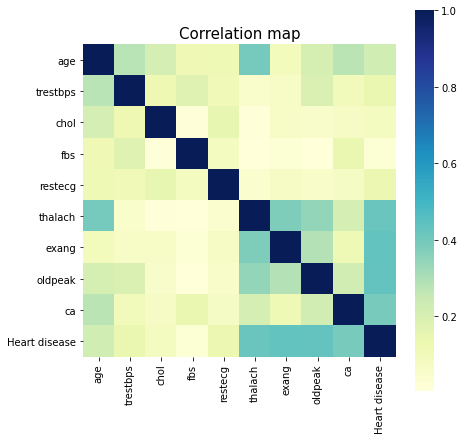

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(df.corr().abs(), vmax=1., square=True, cmap="YlGnBu")
plt.title("Correlation map", fontsize=15)
plt.show()

#### Méthode de spearman

La corrélation de Spearman est étudiée lorsque deux variables statistiques semblent corrélées sans que la relation entre les deux variables soit de type affine. Elle consiste à trouver un coefficient de corrélation, non pas entre les valeurs prises par les deux variables mais entre les rangs de ces valeurs.

On noterra qu'il existe aussi la méthode de Kendall pour obtenir une corrélation par rang.

In [ ]:
corr_spearman = df.corr(method="spearman")
corr_spearman

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,Heart disease
age,1.000000,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,0.340955,-0.238400
trestbps,0.285617,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,0.090140,-0.121593
chol,0.195786,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,0.111981,-0.120888
fbs,0.113978,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,0.134513,-0.028046
restecg,-0.132769,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,-0.097862,0.148612
thalach,-0.398052,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,-0.257347,0.428370
exang,0.089679,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,0.162025,-0.436757
oldpeak,0.268291,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,0.224895,-0.421487
ca,0.340955,0.090140,0.111981,0.134513,-0.097862,-0.257347,0.162025,0.224895,1.000000,-0.457607
Heart disease,-0.238400,-0.121593,-0.120888,-0.028046,0.148612,0.428370,-0.436757,-0.421487,-0.457607,1.000000


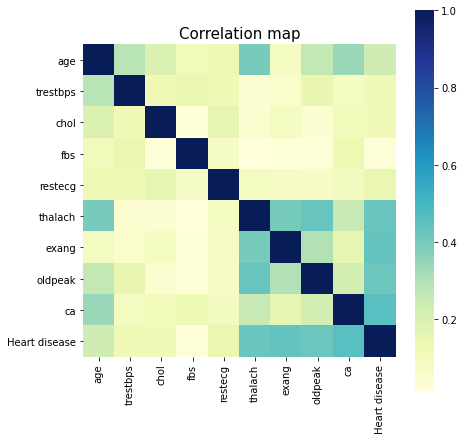

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(method="spearman").abs(), vmax=1., square=True, cmap="YlGnBu")
plt.title("Correlation map", fontsize=15)
plt.show()

#### Analyse de la corrélation simple

On s'intéresse à la corrélation entre **Heart disease** et les toutes les autres variables.

On rapelle que la corrélation entre deux variables donne un indicateur compris entre -1 et 1.

En général, une valeur de corrélation supérieure à 0,7 est considérée comme une forte corrélation. Tout ce qui se situe entre 0,5 et 0,7 est une corrélation modérée, et tout ce qui est inférieur à 0,4 est considéré comme une corrélation faible ou nulle.

In [ ]:
corr_pearson[['Heart disease']]

,Heart disease
age,-0.225439
trestbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230
thalach,0.421741
exang,-0.436757
oldpeak,-0.430696
ca,-0.391724
Heart disease,1.000000


In [ ]:
corr_spearman[['Heart disease']]

,Heart disease
age,-0.238400
trestbps,-0.121593
chol,-0.120888
fbs,-0.028046
restecg,0.148612
thalach,0.428370
exang,-0.436757
oldpeak,-0.421487
ca,-0.457607
Heart disease,1.000000


On considère les variables corrélés à moins de 0.4 comme ayant une corrélation faible voir nulle. Il reste donc :


*   **Thalach**, Fréquence cardiaque maximale atteinte ;
*   **Exang**, Angine de poitrine induite par l'exercice ; 
*   **Oldpeak**, Dépression 'ST' induite par l'exercice par rapport au repos ;
*   **Ca**, Nombre de vaissaux.

Les trois derniers affichant une corrélation négative. C'est à dire étant corrélé à l'inverse. Plus Oldpeak est fort plus Heart disease est faible, Oldpeak a une corrélation négative. A l'inverse, plus Thalach est fort plus Heart Disease a une corrélation forte, la corrélation est positive.

On nottera aussi qu'une variable comme l'âge peut-être correlé d'une façons non perçu par les algorithmes de corrélation. La fonction de corrélation ne prends pas non plus la variable du sexe en compte. On incluera donc ces deux variables en plus dans la liste des indices à analyser.

*   **Age** ;
*   **Sex** ;
*   **Thal** ;
*   **Slope**.



## Analyse des données "importantes"

### Âge et sexe 

### En moyenne, xx % d'homme touché vs xx% de femmes (je sais pas si on peut faire un camembert) + (l'analyse est sur mon word que je t'ai envoyé)



In [97]:
df.plot.pie(subplots=True)

ValueError: ignored

#### Nombre de profils par age et par sexe

Population générale : donc juste plus d'individus dans l'échantillon sont aux alentours de 60ans, et plus d'homme dans la population de l'étude que de femmes. gros de la pop° entre 50 et 65

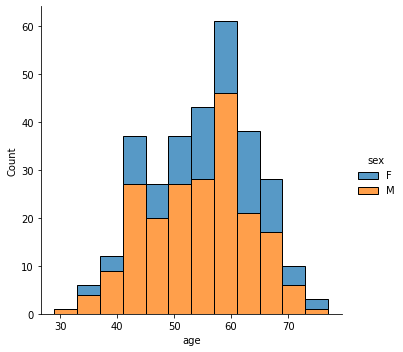

In [ ]:
sns.displot(df, x="age", kde=False, hue="sex", multiple="stack")

#### Nombre de profils avec une maladie cardiaque par age et par sexe

A gauche pop ° non atteinte, et à droite atteinte, à droite non atteinte : sur la pop° générale, sans prendre en compte la maladie plus d'H que de femme, mais dans les personnes atteintes, il y a l'air bcp de femmes. 

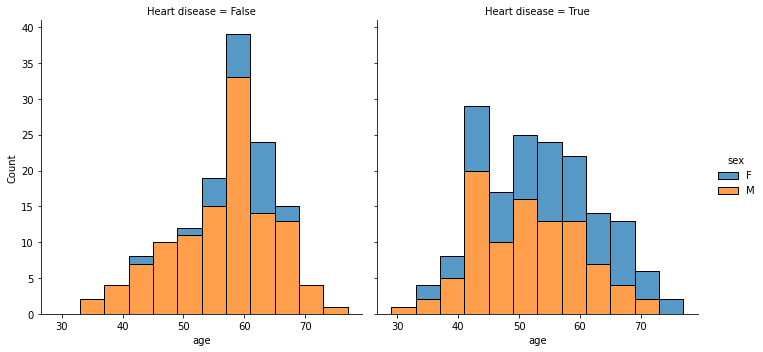

In [ ]:
sns.displot(df, x="age", kde=False, hue="sex", multiple="stack", col="Heart disease")

### Ca

#### Valeurs de Ca par rapport à Heart disease

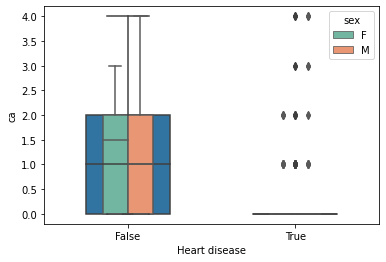

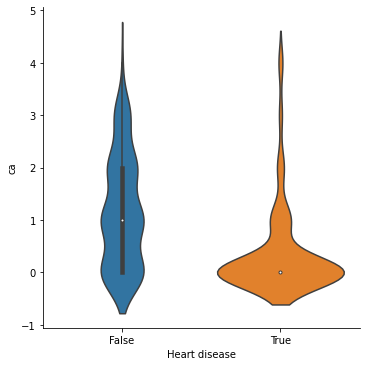

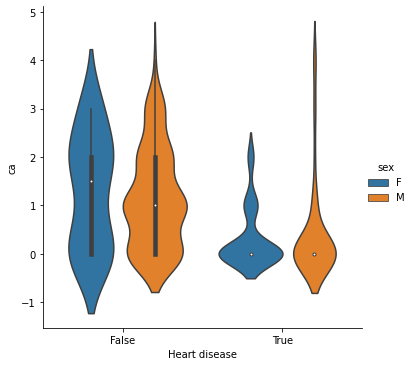

In [ ]:
sns.boxplot(x='Heart disease', y='ca', data=df, width=0.5)
sns.boxplot(x='Heart disease', y='ca', hue="sex", palette="Set2", data=df, width=0.3)
sns.catplot(x="Heart disease", y="ca", kind="violin", data=df)
sns.catplot(x="Heart disease", y="ca", hue="sex", kind="violin", data=df)

#### Valeurs de Ca par rapport à l'age

##### Femmes et Hommes confondus

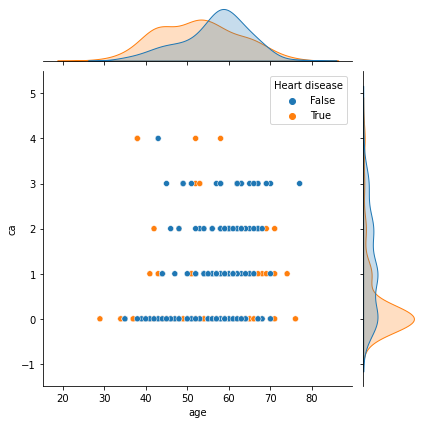

In [ ]:
sns.jointplot(x="age", y="ca", hue="Heart disease", data=df)

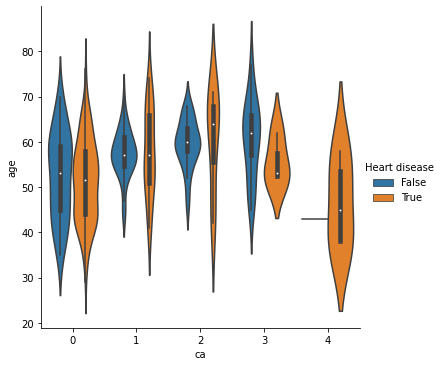

In [ ]:
sns.catplot(x="ca", y="age", hue="Heart disease", kind="violin", data=df)

##### Hommes

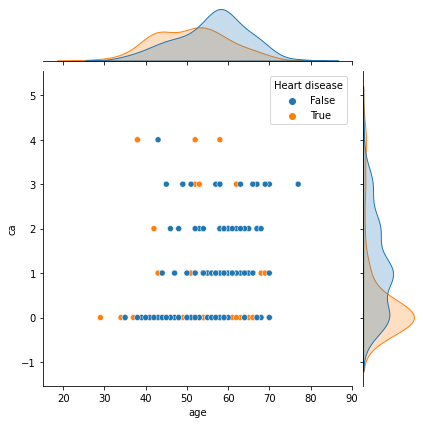

In [ ]:
sns.jointplot(x="age", y="ca", hue="Heart disease", data=df[(df.sex == 'M')])

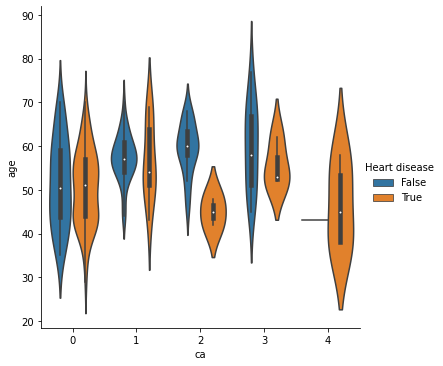

In [ ]:
sns.catplot(x="ca", y="age", hue="Heart disease", kind="violin", data=df[(df.sex == "M")])

##### Femmes

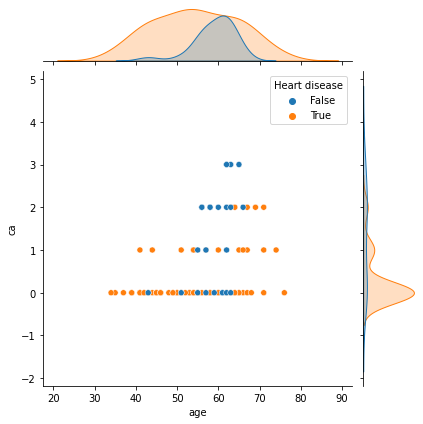

In [ ]:
sns.jointplot(x="age", y="ca", hue="Heart disease", data=df[(df.sex == 'F')])

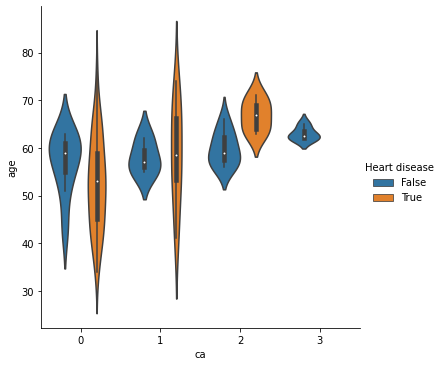

In [ ]:
sns.catplot(x="ca", y="age", hue="Heart disease", kind="violin", data=df[(df.sex == "F")])

### Oldpeak

#### Valeur de Oldpeak par rapport à Heart Disease

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


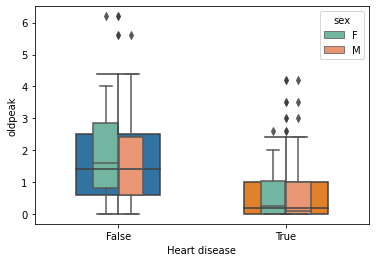

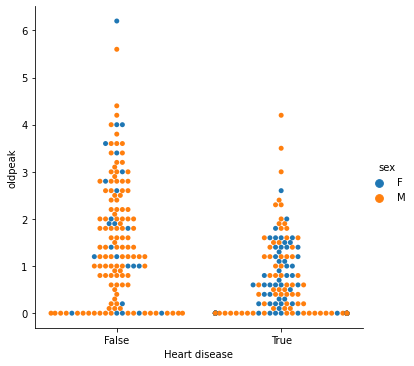

In [ ]:
sns.boxplot(x='Heart disease', y='oldpeak', data=df, width=0.5)
sns.boxplot(x='Heart disease', y='oldpeak', hue="sex", palette="Set2", data=df, width=0.3)
sns.catplot(x="Heart disease", y="oldpeak", hue="sex", kind="swarm", data=df)

#### Valeurs de oldpeak par rapport à l'age

##### Femmes et Hommes confondus

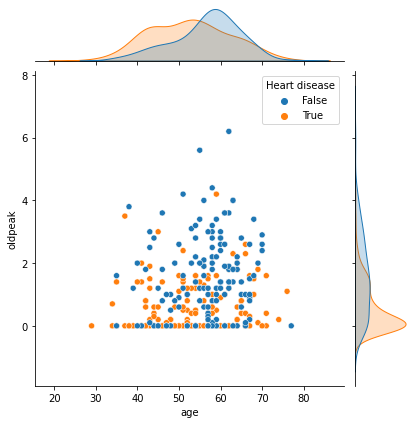

In [ ]:
sns.jointplot(x="age", y="oldpeak", hue="Heart disease", data=df)

##### Hommes

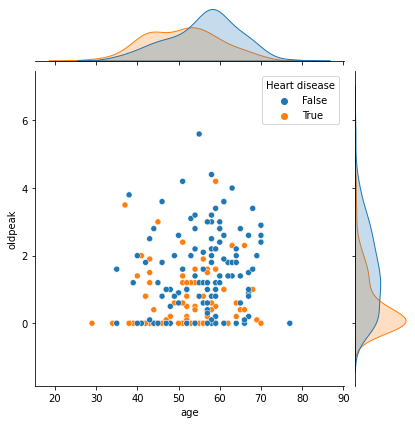

In [ ]:
sns.jointplot(x="age", y="oldpeak", hue="Heart disease", data=df[(df.sex == 'M')])

##### Femmes

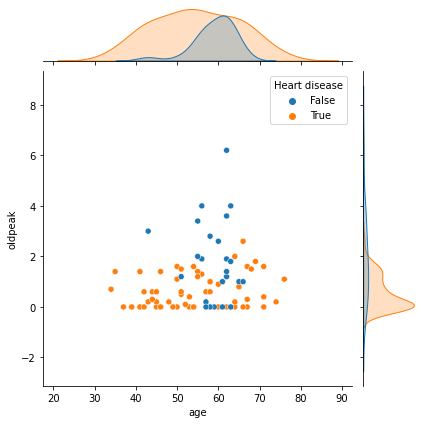

In [ ]:
sns.jointplot(x="age", y="oldpeak", hue="Heart disease", data=df[(df.sex == 'F')])

### Exang

#### Valeurs de Exang par rapport à Heart Disease et l'age

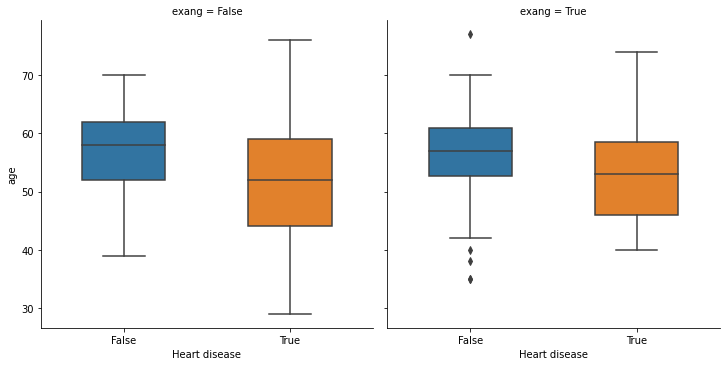

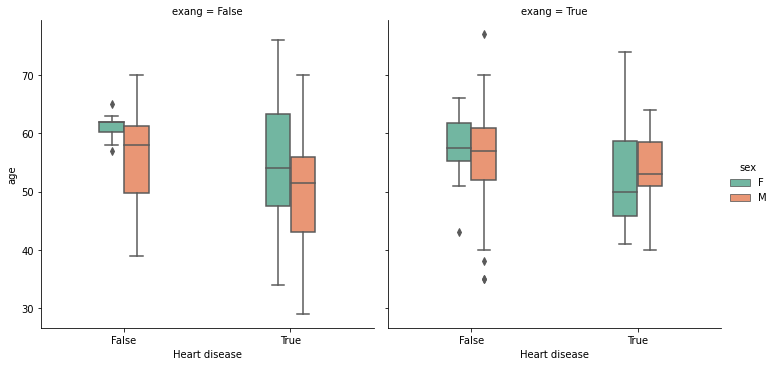

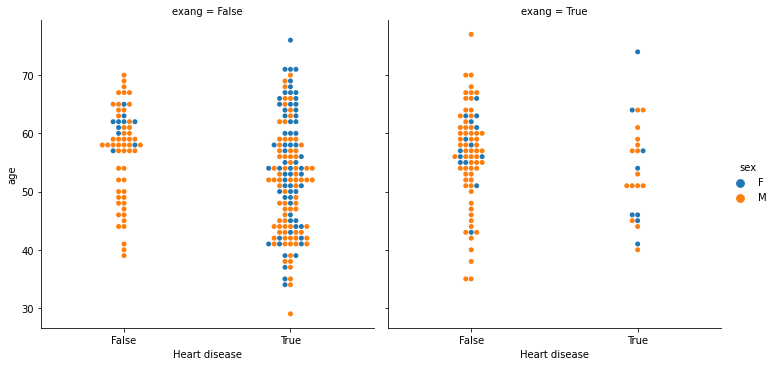

In [ ]:
sns.catplot(x='Heart disease', y='age', col="exang", kind="box", data=df, width=0.5)
sns.catplot(x='Heart disease', y='age', col="exang", kind="box", hue="sex", palette="Set2", data=df, width=0.3)
sns.catplot(x="Heart disease", y="age", col="exang", hue="sex", kind="swarm", data=df)

#### Valeurs de Exang par rapport à l'age

##### Femmes et Hommes confondus

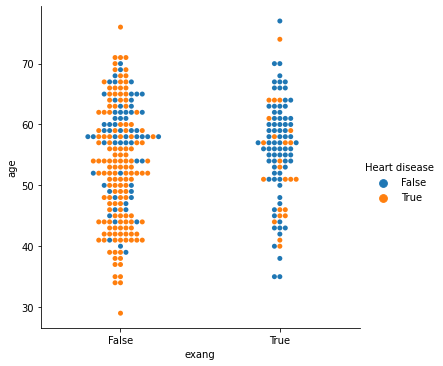

In [ ]:
sns.catplot(x="exang", y="age", hue="Heart disease", kind="swarm", data=df)

##### Femmes et Hommes séparés

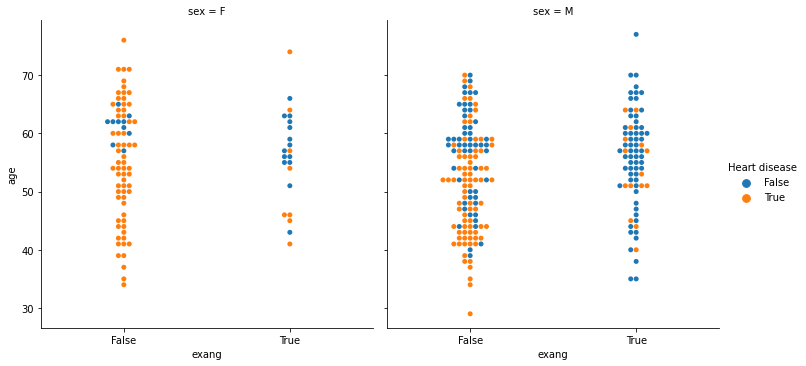

In [ ]:
sns.catplot(x="exang", y="age", col="sex", hue="Heart disease", kind="swarm", data=df)

### Thalach

#### Valeur de thalach par rapport à Heart Disease

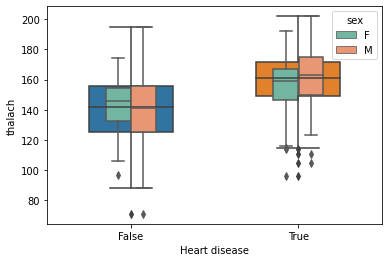

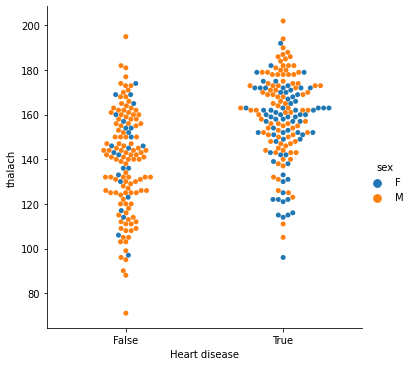

In [ ]:
sns.boxplot(x='Heart disease', y='thalach', data=df, width=0.5)
sns.boxplot(x='Heart disease', y='thalach', hue="sex", palette="Set2", data=df, width=0.3)
sns.catplot(x="Heart disease", y="thalach", hue="sex", kind="swarm", data=df)

#### Valeurs de Thalach par rapport à l'age

##### Femmes et Hommes confondus

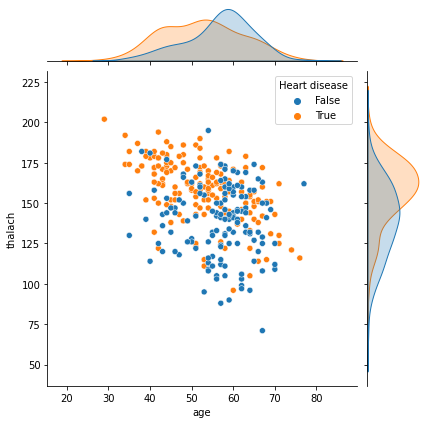

In [ ]:
sns.jointplot(x="age", y="thalach", hue="Heart disease", data=df)

##### Hommes

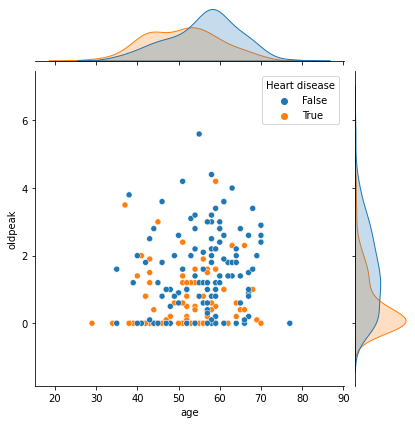

In [ ]:
sns.jointplot(x="age", y="oldpeak", hue="Heart disease", data=df[(df.sex == 'M')])

##### Femmes

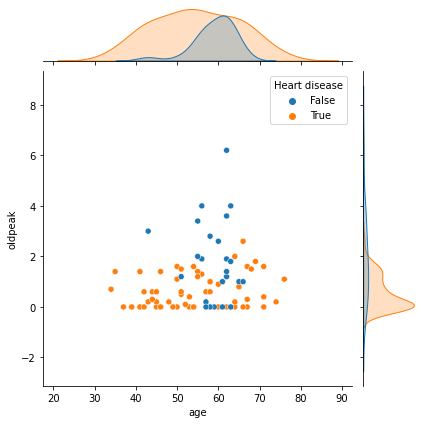

In [ ]:
sns.jointplot(x="age", y="oldpeak", hue="Heart disease", data=df[(df.sex == 'F')])

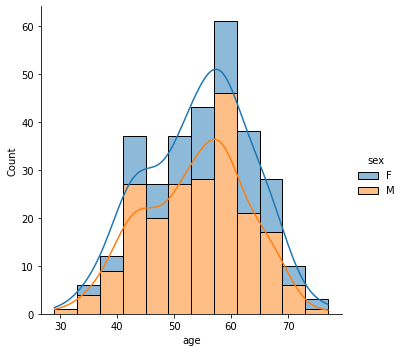

In [ ]:
sns.displot(df, x="age", kde=True, hue="sex", multiple="stack")

In [ ]:
df[(df["Heart disease"] == True)]['age'].describe()

count    165.000000
mean      52.496970
std        9.550651
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64

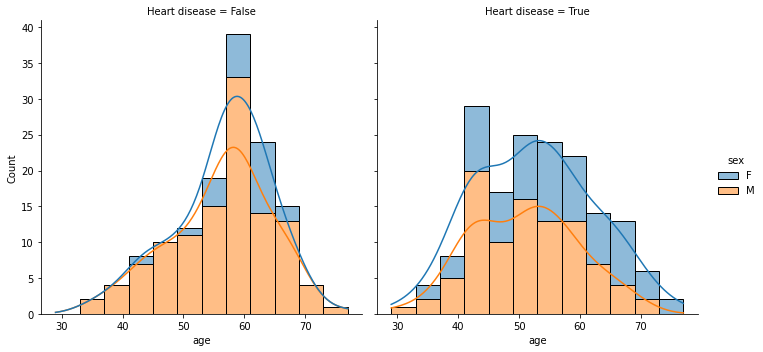

In [ ]:
sns.displot(df, x="age", kde=True, hue="sex", multiple="stack", col="Heart disease")

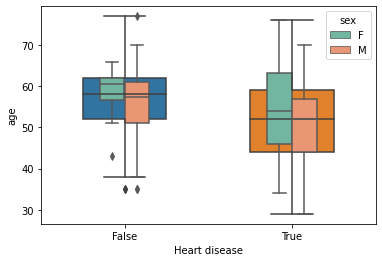

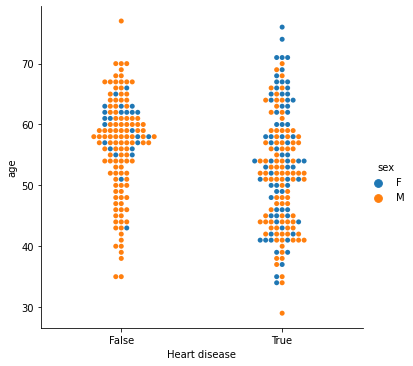

In [ ]:
sns.boxplot(x='Heart disease', y='age', data=df, width=0.5)
sns.boxplot(x='Heart disease', y='age', hue="sex", palette="Set2", data=df, width=0.3)
sns.catplot(x="Heart disease", y="age", kind="swarm", hue="sex", data=df)

## Comparaison avec les recherches bibliographiques

In [ ]:
df[(df['Heart disease'] == True)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart disease
0,63,M,typical angina,145,233,1,0,150,False,2.3,downsloping,0,FIXED,True
1,37,M,non-anginal pain,130,250,0,1,187,False,3.5,downsloping,0,NORMAL,True
2,41,F,atypical angina,130,204,0,0,172,False,1.4,upsloping,0,NORMAL,True
3,56,M,atypical angina,120,236,0,1,178,False,0.8,upsloping,0,NORMAL,True
4,57,F,asymptomatic,120,354,0,1,163,True,0.6,upsloping,0,NORMAL,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,M,atypical angina,120,240,0,1,169,False,0.0,downsloping,0,NORMAL,True
161,55,F,atypical angina,132,342,0,1,166,False,1.2,upsloping,0,NORMAL,True
162,41,M,atypical angina,120,157,0,1,182,False,0.0,upsloping,0,NORMAL,True
163,38,M,non-anginal pain,138,175,0,1,173,False,0.0,upsloping,4,NORMAL,True


### âge et sexe 
En France, l'âge moyen de survenue de l'infarctus du myocarde est de 61 ans chez l'homme et de 75 ans chez la femme. Son incidence maximale se situe dans la décennie des 60 - 69 ans chez l'homme et des 70 - 79 ans chez la femme. Les hommes sont en moyenne plus touché que les femmes par la maladie, mais un rattrapage s'opère à partir de la ménopause. Ces résultats se retrouvent également dans l'analyse de notre base de données.

### exang 
La variable exang présente une forte corrélation avec la variable Heart Disease dans notre analyse. Dans la réalité, la présence d'angine de poitrine représente un gros risque de présence de maladie cardiaque également. 

### trestbps

La corrélation de cette variable avec la variabe Heart Disease est très faible (-0.14). Pourtant, nos recherches indiquent le contraire. En effet, la tension artérielle normale est de l’ordre de 120/70 millimètres de mercure (mmHg)
Par définition, on est hypertendu à partir de 140/90 mmHg. Au-delà, le risque  de complication vasculaire augmente progressivement : insuffisance coronaire (angine de poitrine et infarctus du myocarde), accident vasculaire cérébral (AVC), insuffisance rénale, artérite des membres inférieurs… Comparons ces résultats médicaux avec ceux de la base de données. 



In [ ]:
df[(df["Heart disease"] == True)]['trestbps'].describe()

count    165.000000
mean     129.303030
std       16.169613
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps, dtype: float64

In [ ]:
df[(df["Heart disease"] == False )]['trestbps'].describe()

count    138.000000
mean     134.398551
std       18.729944
min      100.000000
25%      120.000000
50%      130.000000
75%      144.750000
max      200.000000
Name: trestbps, dtype: float64

Ici, la pression artérielle moyenne chez les individus atteints est inférieure à celle des individus non atteints. La moitié des patients malades et non malades ont une pression artérielle de 130mm HG, et la pression artérielle maxium atteinte est supérieure chez les patients non atteints par la maladie. Nous en déduisont que cette variable n'a pas de cohérence médicale, et que nous ne pouvons pas l'interpréter dans notre modèle

### chol


En fait je ne sais plus ce que tu avais trouvé mais c'était mieux que mes recherches pcq les tienne prenaient en compte l'âge ou je sais plus quoi. Donc limite faire ça par tranche d'âge ?

In [ ]:
df[(df["Heart disease"] == True)]['chol'].describe()

count    165.000000
mean     242.230303
std       53.552872
min      126.000000
25%      208.000000
50%      234.000000
75%      267.000000
max      564.000000
Name: chol, dtype: float64

In [ ]:
df[(df["Heart disease"] == False)]['chol'].describe()

count    138.000000
mean     251.086957
std       49.454614
min      131.000000
25%      217.250000
50%      249.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64

## restecg

D'après nos recherches, si les résultats d'électrocardiogramme sont égaux à 0 ou 2, cela renforce les risques d'être atteints de maladie cardiaque. Or la corrélation entre cette variable et heart disease est très faible. 

### cp et oldpeak
Nous n'avons pas trouvé de données pertinentes sur ces variables lors de nos recherches 

### Autres variables sans corrélation dans nos recherches
Les variables thalach, slope, fbs, ca, et thal n'ont a priori pas d'influence sur la probabilité d'être atteint de maladie cardiaque. Pourtant, les variables slope et ca ont une corrélation forte avec la variable Heart Disease. 

# Construction des jeux d'entraînement, de test et entrainement d’un modèle

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [ ]:
df_model = df.copy()
df_model.sex = df_model.sex.replace('M',True)
df_model.sex = df_model.sex.replace('F',False)
df_model.sex = df_model.sex.astype('boolean')

In [ ]:
y = df_model["Heart disease"]
y = y.astype(int)
X = df_model[["age", "sex", "thalach", "exang", "oldpeak", "ca"]]

# Split into test and training sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
X_train

,age,sex,thalach,exang,oldpeak,ca
164,38,True,173,False,0.0,4
46,44,True,180,False,0.0,0
197,67,True,163,False,0.2,2
115,37,False,170,False,0.0,0
128,52,False,169,False,0.1,0
...,...,...,...,...,...,...
211,61,True,140,True,3.6,1
67,45,False,175,False,0.6,0
25,71,False,162,False,0.4,2
196,46,True,147,False,3.6,0


In [ ]:
X_test

,age,sex,thalach,exang,oldpeak,ca
125,34,False,192,False,0.7,0
57,45,True,185,False,0.0,0
282,59,True,134,False,2.2,1
66,51,True,143,True,1.2,0
114,55,True,155,False,0.0,0
...,...,...,...,...,...,...
240,70,True,112,True,2.9,1
181,65,False,114,False,1.0,3
155,58,False,131,False,0.6,0
141,43,True,181,False,1.2,0


In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [ ]:
X_test

,age,sex,thalach,exang,oldpeak,ca
125,34,False,192,False,0.7,0
57,45,True,185,False,0.0,0
282,59,True,134,False,2.2,1
66,51,True,143,True,1.2,0
114,55,True,155,False,0.0,0
...,...,...,...,...,...,...
240,70,True,112,True,2.9,1
181,65,False,114,False,1.0,3
155,58,False,131,False,0.6,0
141,43,True,181,False,1.2,0


# Evaluation du modèle et commentaires

#Brouillon

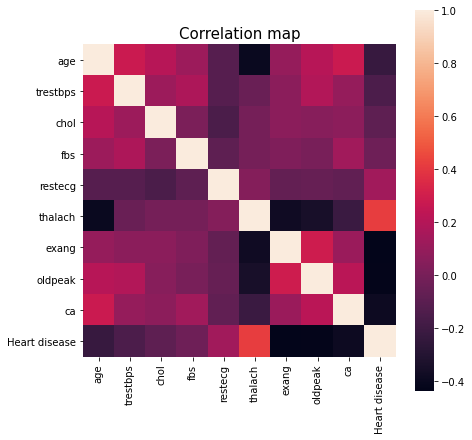

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), vmax=1., square=True)
plt.title("Correlation map", fontsize=15)
plt.show()

In [ ]:
df.groupby(['Heart disease']).mean()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca
Heart disease,,,,,,,,,
False,56.601449,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667
True,52.496970,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,0.363636


Il est aussi intéressant de regarder les médiannes.

In [ ]:
df.groupby(['Heart disease']).median()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca
Heart disease,,,,,,,,,
False,58,130,249,0,0,142,True,1.4,1
True,52,130,234,0,1,161,False,0.2,0


In [ ]:
df.groupby(['exang']).mean()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,Heart disease
exang,,,,,,,,,
False,53.754902,130.799020,243.848039,0.142157,0.553922,155.681373,0.806863,0.647059,0.696078
True,55.626263,133.323232,251.242424,0.161616,0.474747,137.212121,1.519192,0.898990,0.232323


In [ ]:
df.groupby(['age','sex']).mean()

trestbps   chol  fbs  restecg  ...  exang  oldpeak   ca  Heart disease
age sex                                 ...                                    
29  F         NaN    NaN  NaN      NaN  ...    NaN      NaN  NaN            NaN
    M       130.0  204.0  0.0      0.0  ...    0.0      0.0  0.0            1.0
34  F       118.0  210.0  0.0      1.0  ...    0.0      0.7  0.0            1.0
    M       118.0  182.0  0.0      0.0  ...    0.0      0.0  0.0            1.0
35  F       138.0  183.0  0.0      1.0  ...    0.0      1.4  0.0            1.0
...           ...    ...  ...      ...  ...    ...      ...  ...            ...
74  M         NaN    NaN  NaN      NaN  ...    NaN      NaN  NaN            NaN
76  F       140.0  197.0  0.0      2.0  ...    0.0      1.1  0.0            1.0
    M         NaN    NaN  NaN      NaN  ...    NaN      NaN  NaN            NaN
77  F         NaN    NaN  NaN      NaN  ...    NaN      NaN  NaN            NaN
    M       125.0  304.0  0.0      0.0  ...    1.0      0.0  3.0            0.0

[82 rows x 9 columns]

In [ ]:
menBetween50And60 = df[(df.age > 49) & (df.age < 61) & (df.sex == 'M')]
womenBetween60And70 = df[(df.age > 59) & (df.age < 71) & (df.sex == 'F')]

In [ ]:
menBetween50And60.groupby(['Heart disease']).mean()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca
Heart disease,,,,,,,,,
False,56.263158,134.491228,248.175439,0.157895,0.438596,138.473684,0.578947,1.600000,1.105263
True,54.487805,130.512195,227.170732,0.243902,0.609756,159.121951,0.219512,0.658537,0.463415


In [ ]:
menBetween50And60.groupby(['thal']).mean()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,Heart disease
thal,,,,,,,,,,
ABNORMAL,55.842105,134.491228,246.631579,0.140351,0.491228,144.035088,0.526316,1.419298,0.964912,0.280702
ERROR,52.000000,128.000000,204.000000,1.000000,1.000000,156.000000,1.000000,1.000000,0.000000,0.000000
FIXED,56.777778,131.555556,223.000000,0.333333,0.555556,131.888889,0.444444,1.422222,1.000000,0.333333
NORMAL,54.677419,130.290323,231.967742,0.225806,0.516129,156.903226,0.225806,0.758065,0.580645,0.709677


In [ ]:
womenBetween60And70.groupby(['Heart disease']).mean()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca
Heart disease,,,,,,,,,
False,62.461538,142.538462,265.692308,0.153846,0.461538,144.00,0.384615,1.976923,1.615385
True,64.350000,137.250000,289.550000,0.100000,0.650000,148.45,0.050000,0.725000,0.600000


In [ ]:
df.groupby(['age']).corr('pearson').to_excel('output1.xlsx')

In [ ]:
df.corr(method='pearson')

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,Heart disease
age,1.000000,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,0.276326,-0.225439
trestbps,0.279351,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,0.101389,-0.144931
chol,0.213678,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,0.070511,-0.085239
fbs,0.121308,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,0.137979,-0.028046
restecg,-0.116211,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,-0.072042,0.137230
thalach,-0.398522,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,-0.213177,0.421741
exang,0.096801,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,0.115739,-0.436757
oldpeak,0.210013,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,0.222682,-0.430696
ca,0.276326,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,1.000000,-0.391724
Heart disease,-0.225439,-0.144931,-0.085239,-0.028046,0.137230,0.421741,-0.436757,-0.430696,-0.391724,1.000000


In [ ]:
df.corr(method='kendall')

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,Heart disease
age,1.000000,0.201071,0.135062,0.094595,-0.109349,-0.280009,0.074427,0.193269,0.273255,-0.197857
trestbps,0.201071,1.000000,0.086474,0.127574,-0.105147,-0.027760,0.044419,0.109103,0.070387,-0.102064
chol,0.135062,0.086474,1.000000,0.015140,-0.132664,-0.031437,0.075044,0.035176,0.088549,-0.099131
fbs,0.094595,0.127574,0.015140,1.000000,-0.080996,-0.011749,0.025665,0.024342,0.126434,-0.028046
restecg,-0.109349,-0.105147,-0.132664,-0.080996,1.000000,0.072481,-0.076913,-0.066262,-0.091541,0.147678
thalach,-0.280009,-0.027760,-0.031437,-0.011749,0.072481,1.000000,-0.329965,-0.306843,-0.198407,0.352609
exang,0.074427,0.044419,0.075044,0.025665,-0.076913,-0.329965,1.000000,0.255042,0.152294,-0.436757
oldpeak,0.193269,0.109103,0.035176,0.024342,-0.066262,-0.306843,0.255042,1.000000,0.183166,-0.361731
ca,0.273255,0.070387,0.088549,0.126434,-0.091541,-0.198407,0.152294,0.183166,1.000000,-0.430124
Heart disease,-0.197857,-0.102064,-0.099131,-0.028046,0.147678,0.352609,-0.436757,-0.361731,-0.430124,1.000000


In [ ]:
df.corr(method='spearman')

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,Heart disease
age,1.000000,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,0.340955,-0.238400
trestbps,0.285617,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,0.090140,-0.121593
chol,0.195786,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,0.111981,-0.120888
fbs,0.113978,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,0.134513,-0.028046
restecg,-0.132769,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,-0.097862,0.148612
thalach,-0.398052,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,-0.257347,0.428370
exang,0.089679,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,0.162025,-0.436757
oldpeak,0.268291,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,0.224895,-0.421487
ca,0.340955,0.090140,0.111981,0.134513,-0.097862,-0.257347,0.162025,0.224895,1.000000,-0.457607
Heart disease,-0.238400,-0.121593,-0.120888,-0.028046,0.148612,0.428370,-0.436757,-0.421487,-0.457607,1.000000


In [ ]:
df[df.sex == 'M'].corr('pearson')

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,Heart disease
age,1.000000,0.254196,0.158983,0.128019,-0.181487,-0.408594,0.152930,0.234677,0.253648,-0.290993
trestbps,0.254196,1.000000,0.085369,0.155453,-0.171975,-0.024399,-0.035431,0.105156,0.032538,-0.065489
chol,0.158983,0.085369,1.000000,-0.052741,-0.091180,-0.049573,0.106014,0.050238,0.101658,-0.175665
fbs,0.128019,0.155453,-0.052741,1.000000,-0.045044,0.046749,-0.034822,-0.042910,0.088892,0.057675
restecg,-0.181487,-0.171975,-0.091180,-0.045044,1.000000,0.088643,-0.099220,-0.032553,-0.046168,0.168234
thalach,-0.408594,-0.024399,-0.049573,0.046749,0.088643,1.000000,-0.460471,-0.376667,-0.229904,0.485584
exang,0.152930,-0.035431,0.106014,-0.034822,-0.099220,-0.460471,1.000000,0.327622,0.125998,-0.393720
oldpeak,0.234677,0.105156,0.050238,-0.042910,-0.032553,-0.376667,0.327622,1.000000,0.125059,-0.393169
ca,0.253648,0.032538,0.101658,0.088892,-0.046168,-0.229904,0.125998,0.125059,1.000000,-0.339703
Heart disease,-0.290993,-0.065489,-0.175665,0.057675,0.168234,0.485584,-0.393720,-0.393169,-0.339703,1.000000


In [ ]:
df[df.sex == 'F'].corr('pearson')

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,Heart disease
age,1.000000,0.313959,0.260548,0.124083,-0.012528,-0.405403,0.018810,0.194259,0.392505,-0.207531
trestbps,0.313959,1.000000,0.152388,0.236101,-0.025030,-0.107343,0.318881,0.388379,0.288057,-0.391957
chol,0.260548,0.152388,1.000000,0.143198,-0.269255,0.031100,0.094297,0.116412,0.099305,-0.121769
fbs,0.124083,0.236101,0.143198,1.000000,-0.163384,-0.160302,0.168615,0.112742,0.265043,-0.218218
restecg,-0.012528,-0.025030,-0.269255,-0.163384,1.000000,-0.069620,0.017701,-0.097554,-0.115041,0.032553
thalach,-0.405403,-0.107343,0.031100,-0.160302,-0.069620,1.000000,-0.126448,-0.248973,-0.145191,0.252103
exang,0.018810,0.318881,0.094297,0.168615,0.017701,-0.126448,1.000000,0.151888,0.024155,-0.486509
oldpeak,0.194259,0.388379,0.116412,0.112742,-0.097554,-0.248973,0.151888,1.000000,0.461652,-0.500454
ca,0.392505,0.288057,0.099305,0.265043,-0.115041,-0.145191,0.024155,0.461652,1.000000,-0.487205
Heart disease,-0.207531,-0.391957,-0.121769,-0.218218,0.032553,0.252103,-0.486509,-0.500454,-0.487205,1.000000


In [ ]:
df[df.sex == 'F'].groupby('Heart disease')['age'].apply(lambda group_series: group_series.tolist()).reset_index()

,Heart disease,age
0,False,"[62, 65, 61, 51, 62, 60, 61, 43, 62, 63, 56, 5..."
1,True,"[41, 57, 56, 48, 58, 50, 58, 66, 69, 71, 65, 4..."
